In [2]:
### In here we perform the initial simple tests. The covariates are all independent gaussian variables. We then plot the
### performance against the change of some crucial parameters

In [3]:
### Some initializations
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
from matplotlib.patches import Patch
import scipy.stats
import warnings
import itertools
import loli
from heapq import nlargest
from sklearn.cluster import KMeans

In [66]:
E=100
x=np.random.lognormal(1,E)
y=np.random.lognormal(1,E)
print(np.max(x)/np.max(y))

6.599681273684576e+73


Sample size 1 of 6
Sample size 2 of 6
Sample size 3 of 6
Sample size 4 of 6
Sample size 5 of 6
Sample size 6 of 6


C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:119: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:120: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:121: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:122: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


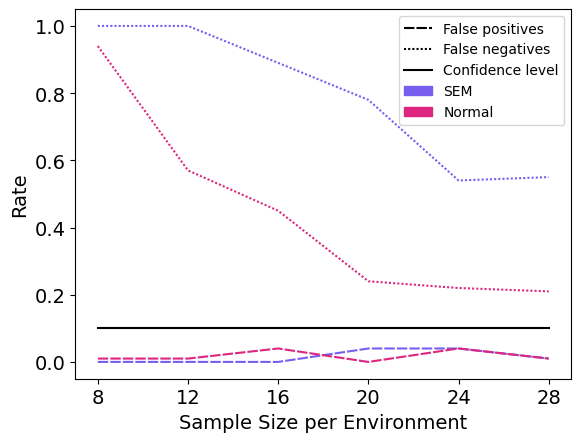

<Figure size 640x480 with 0 Axes>

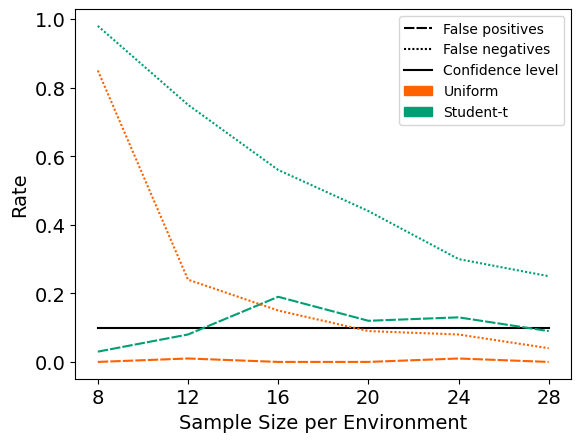

Sample size 1 of 6
Sample size 2 of 6
Sample size 3 of 6
Sample size 4 of 6
Sample size 5 of 6
Sample size 6 of 6


<Figure size 640x480 with 0 Axes>

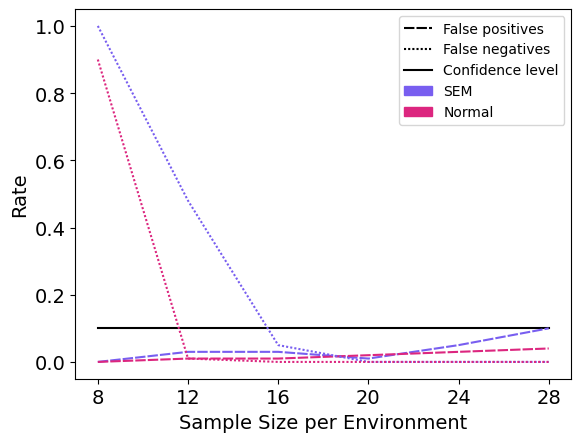

<Figure size 640x480 with 0 Axes>

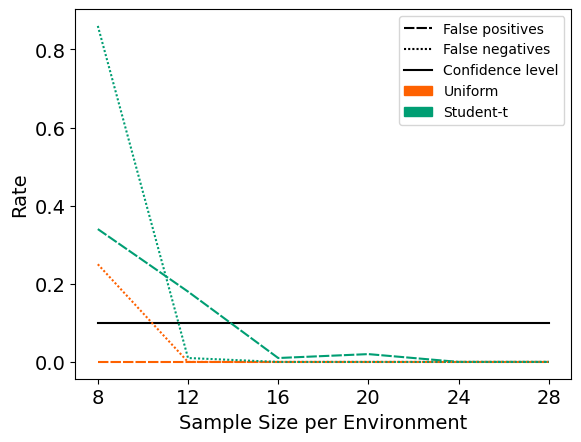

<Figure size 640x480 with 0 Axes>

In [4]:
### Changing sample size
for I in [5,50]:
    np.random.seed(1)
    d=6  #Dimensionality
    supp=(1,2) #support indices
    s=len(supp)  #Number of support entries
    sample=[8,12,16,20,24,28]
    fntrunc=np.zeros((len(sample)))
    fptrunc=np.zeros((len(sample)))
    fnt=np.zeros((len(sample)))
    fpt=np.zeros((len(sample)))
    fnind=np.zeros((len(sample)))
    fpind=np.zeros((len(sample)))
    fn=np.zeros((len(sample)))
    fp=np.zeros((len(sample)))
    runs=100
    l=1 # Number of intervals we combine for the statistics
    B=100 # Bootstrap runs
    a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
    subsets = [item for sublist in a for item in sublist]
    dic={}
    # We first fix the data for all runs, to eliminate the randomness of this.
    betas=np.zeros((runs,I,d))
    for r in range(runs):
        for i in range(I):
            betas[r,i,supp]=np.random.uniform(low=1,high=5,size=(s))

    for o,n in enumerate(sample):
        print('Sample size',o+1,'of',len(sample))
        for r in range(runs):
            X=[]
            Y=[]
            Xind=[]
            Yind=[]
            Xtrunc=[]
            Ytrunc=[]
            Xt=[]
            Yt=[]
            for i in range(I):
                x=np.zeros((n,d))
                y=np.zeros((n))
                std=np.random.uniform(low=1,high=5,size=(d))
                x[:,0]=np.random.normal(scale=std[0],size=(n))
                x[:,1]=x[:,0]+np.random.normal(scale=std[1],size=(n))
                x[:,2]=0.3*x[:,1]+np.random.normal(scale=std[2],size=(n))
                x[:,3]=0.2*x[:,2]+np.random.normal(scale=std[3],size=(n))
                e=np.random.multivariate_normal(0*np.ones(n),2*np.eye(n))
                y=x@betas[r,i,:]+e
                x[:,4]=np.random.normal(scale=std[4],size=(n))+0.1*x[:,1]+y
                x[:,5]=np.random.normal(scale=std[5],size=(n))+y

                X.append(x)
                Y.append(y)

                xind=np.zeros((n,d))
                yind=np.zeros((n))
                ytrunc=np.zeros((n))
                yt=np.zeros((n))
                xtrunc=np.zeros((n,d))
                xt=np.zeros((n,d))

                mean=np.random.uniform(low=-1,high=1,size=(d))
                for p in range(d):
                    xtrunc[:,p]=np.random.uniform(low=-6*std[p]**2,high=6*std[p]**2,size=(n))+mean[p]
                    xt[:,p]=np.random.standard_t(2*(std[p])**(2)/((std[p])**(2)-1),size=(n))+mean[p]
                    xind[:,p]=np.random.normal(mean[p],scale=std[p],size=(n))
                yind=xind@betas[r,i,:]+e
                etrunc=np.random.uniform(low=-6*2**2,high=6*2**2,size=(n))
                ytrunc=xtrunc@betas[r,i,:]+etrunc
                et=np.random.standard_t(2*(2)**(2)/((2)**(2)-1),size=(n))
                yt=xt@betas[r,i,:]+et

                Xind.append(xind)
                Yind.append(yind)
                Xtrunc.append(xtrunc)
                Ytrunc.append(ytrunc)
                Xt.append(xt)
                Yt.append(yt)

            plausibleS=loli.gauss(X,Y)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fp[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fn[o]+=1/runs

            plausibleS=loli.gauss(Xind,Yind)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fpind[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fnind[o]+=1/runs


            plausibleS=loli.gauss(Xtrunc,Ytrunc)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fptrunc[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fntrunc[o]+=1/runs

            plausibleS=loli.gauss(Xt,Yt)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fpt[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fnt[o]+=1/runs

    fig, ax = plt.subplots()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)

    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    sem = Patch([], [], color='#785EF0',label='SEM')
    normal = Patch([], [], color='#DC267F',label='Normal')
    trunc = Patch([], [], color='#FE6100',label='Uniform')
    student = Patch([], [], color='#009E73',label='Student-t')
    conf= plt.Line2D([], [], color='black',label='Confidence level')

    plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
    plt.plot(sample,fp,'#785EF0',label='False Positive SEM',linestyle=(0, (5, 1)))
    plt.plot(sample,fpind,'#DC267F',label='False Positive Normal',linestyle=(0, (5, 1)))
    plt.plot(sample,fn,'#785EF0',label='False Negative SEM',linestyle=(0, (1, 1)))
    plt.plot(sample,fnind,'#DC267F',label='False Negative Normal',linestyle=(0, (1, 1)))
    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    ax.legend(handles=[false_pos,false_neg,conf,sem,normal])
    plt.xticks(sample)
    plt.xlabel('Sample Size per Environment',fontsize=14)
    plt.ylabel('Rate',fontsize=14)
    plt.show()
    plt.savefig('Figures/SamplechangSem='+str(I)+'.eps',bbox_inches="tight",format='eps')


    fig, ax = plt.subplots()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)
    plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
    plt.plot(sample,fptrunc,'#FE6100',label='False Positive Truncated',linestyle=(0, (5, 1)))
    plt.plot(sample,fpt,'#009E73',label='False Positive Student-t',linestyle=(0, (5, 1)))
    plt.plot(sample,fntrunc,'#FE6100',label='False Negative Truncated',linestyle=(0, (1, 1)))
    plt.plot(sample,fnt,'#009E73',label='False Negative Student-t',linestyle=(0, (1, 1)))
    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    ax.legend(handles=[false_pos,false_neg,conf,trunc,student])
    plt.xticks(sample)
    plt.xlabel('Sample Size per Environment',fontsize=14)
    plt.ylabel('Rate',fontsize=14)
    plt.show()
    plt.savefig('Figures/SamplechangNonNormalE='+str(I)+'.eps',bbox_inches="tight",format='eps')

Noise strength 1 of 5
Noise strength 2 of 5
Noise strength 3 of 5
Noise strength 4 of 5
Noise strength 5 of 5


C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:124: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


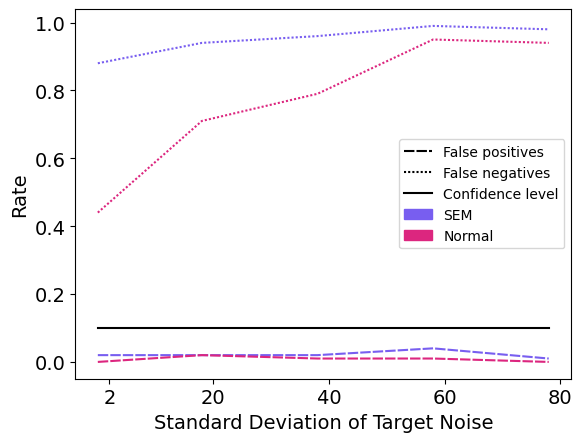

<Figure size 640x480 with 0 Axes>

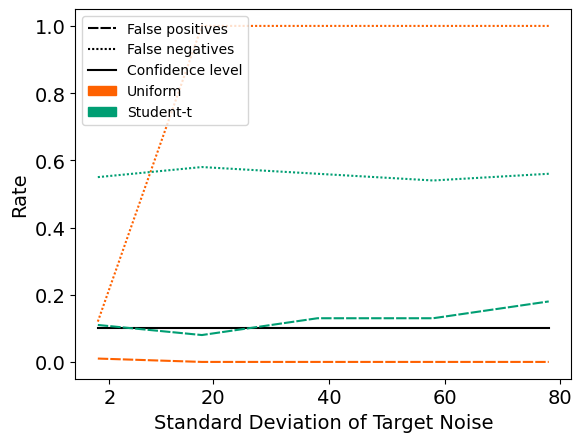

Noise strength 1 of 5
Noise strength 2 of 5
Noise strength 3 of 5
Noise strength 4 of 5
Noise strength 5 of 5


<Figure size 640x480 with 0 Axes>

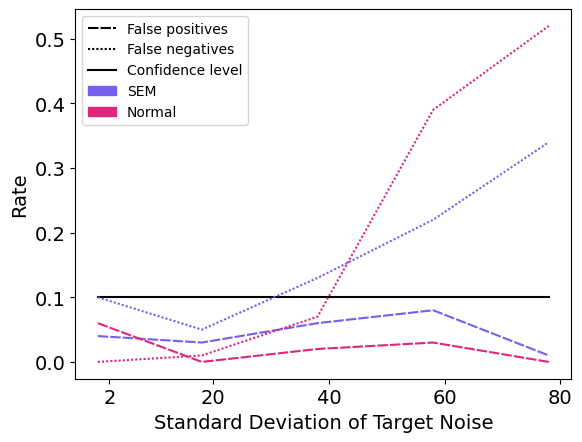

<Figure size 640x480 with 0 Axes>

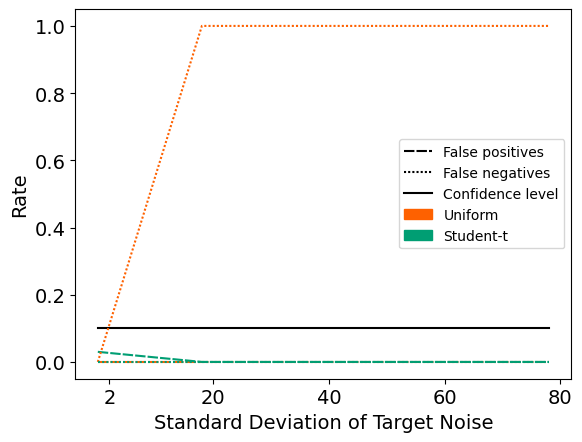

<Figure size 640x480 with 0 Axes>

In [6]:
### Changing noise strength
for I in [5,50]:
    np.random.seed(1)
    d=6  #Dimensionality
    supp=(1,2) #support indices
    s=len(supp)  #Number of support entries
    noise=[0,18,38,58,78]
    fntrunc=np.zeros((len(noise)))
    fptrunc=np.zeros((len(noise)))
    fnt=np.zeros((len(noise)))
    fpt=np.zeros((len(noise)))
    fnind=np.zeros((len(noise)))
    fpind=np.zeros((len(noise)))
    fn=np.zeros((len(noise)))
    fp=np.zeros((len(noise)))
    runs=100
    l=1 # Number of intervals we combine for the statistics
    B=100 # Bootstrap runs
    n=15
    a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
    subsets = [item for sublist in a for item in sublist]
    dic={}
    # We first fix the data for all runs, to eliminate the randomness of this.
    betas=np.zeros((runs,I,d))
    for r in range(runs):
        for i in range(I):
            betas[r,i,supp]=np.random.uniform(low=1,high=5,size=(s))

    for o,nos in enumerate(noise):
        print('Noise strength',o+1,'of',len(noise))
        for r in range(runs):
            X=[]
            Y=[]
            Xind=[]
            Yind=[]
            Xtrunc=[]
            Ytrunc=[]
            Xt=[]
            Yt=[]
            for i in range(I):
                x=np.zeros((n,d))
                y=np.zeros((n))
                std=np.random.uniform(low=1,high=5,size=(d))
                x[:,0]=np.random.normal(scale=std[0],size=(n))
                x[:,1]=x[:,0]+np.random.normal(scale=std[1],size=(n))
                x[:,2]=0.3*x[:,1]+np.random.normal(scale=std[2],size=(n))
                x[:,3]=0.2*x[:,2]+np.random.normal(scale=std[3],size=(n))
                e=np.random.multivariate_normal(0*np.ones(n),(2+nos)*np.eye(n))
                y=x@betas[r,i,:]+e
                x[:,4]=np.random.normal(scale=std[4],size=(n))+0.1*x[:,1]+y
                x[:,5]=np.random.normal(scale=std[5],size=(n))+y

                X.append(x)
                Y.append(y)

                xind=np.zeros((n,d))
                yind=np.zeros((n))
                ytrunc=np.zeros((n))
                yt=np.zeros((n))
                xtrunc=np.zeros((n,d))
                xt=np.zeros((n,d))

                mean=np.random.uniform(low=-1,high=1,size=(d))


                for p in range(d):
                    xtrunc[:,p]=np.random.uniform(low=-6*std[p]**2,high=6*std[p]**2,size=(n))+mean[p]
                    xt[:,p]=np.random.standard_t(2*(std[p])**(2)/((std[p])**(2)-1),size=(n))+mean[p]
                    xind[:,p]=np.random.normal(mean[p],scale=std[p],size=(n))
                yind=xind@betas[r,i,:]+e
                etrunc=np.random.uniform(low=-6*(2+nos)**2,high=6*(2+nos)**2,size=(n))
                ytrunc=xtrunc@betas[r,i,:]+etrunc
                et=np.random.standard_t(2*((2+nos))**(2)/(((2+nos))**(2)-1),size=(n))
                yt=xt@betas[r,i,:]+et


                Xind.append(xind)
                Yind.append(yind)
                Xtrunc.append(xtrunc)
                Ytrunc.append(ytrunc)
                Xt.append(xt)
                Yt.append(yt)

            plausibleS=loli.gauss(X,Y)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fp[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fn[o]+=1/runs

            plausibleS=loli.gauss(Xind,Yind)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fpind[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fnind[o]+=1/runs


            plausibleS=loli.gauss(Xtrunc,Ytrunc)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fptrunc[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fntrunc[o]+=1/runs

            plausibleS=loli.gauss(Xt,Yt)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fpt[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fnt[o]+=1/runs

    fig, ax = plt.subplots()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)

    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    sem = Patch([], [], color='#785EF0',label='SEM')
    normal = Patch([], [], color='#DC267F',label='Normal')
    trunc = Patch([], [], color='#FE6100',label='Uniform')
    student = Patch([], [], color='#009E73',label='Student-t')
    conf= plt.Line2D([], [], color='black',label='Confidence level')

    plt.plot(noise,0.1*np.ones((len(noise))),label='Confidence level',color='black')
    plt.plot(noise,fp,'#785EF0',label='False Positive SEM',linestyle=(0, (5, 1)))
    plt.plot(noise,fpind,'#DC267F',label='False Positive Normal',linestyle=(0, (5, 1)))
    plt.plot(noise,fn,'#785EF0',label='False Negative SEM',linestyle=(0, (1, 1)))
    plt.plot(noise,fnind,'#DC267F',label='False Negative Normal',linestyle=(0, (1, 1)))
    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    ax.legend(handles=[false_pos,false_neg,conf,sem,normal])
    plt.xticks(np.array(noise)+2)
    plt.xlabel('Standard Deviation of Target Noise',fontsize=14)
    plt.ylabel('Rate',fontsize=14)
    plt.show()
    plt.savefig('Figures/NoisechangeSem='+str(I)+'.eps',bbox_inches="tight",format='eps')


    fig, ax = plt.subplots()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)
    plt.plot(noise,0.1*np.ones((len(noise))),label='Confidence level',color='black')
    plt.plot(noise,fptrunc,'#FE6100',label='False Positive Truncated',linestyle=(0, (5, 1)))
    plt.plot(noise,fpt,'#009E73',label='False Positive Student-t',linestyle=(0, (5, 1)))
    plt.plot(noise,fntrunc,'#FE6100',label='False Negative Truncated',linestyle=(0, (1, 1)))
    plt.plot(noise,fnt,'#009E73',label='False Negative Student-t',linestyle=(0, (1, 1)))
    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    ax.legend(handles=[false_pos,false_neg,conf,trunc,student])
    plt.xticks(np.array(noise)+2)
    plt.xlabel('Standard Deviation of Target Noise',fontsize=14)
    plt.ylabel('Rate',fontsize=14)
    plt.show()
    plt.savefig('Figures/NoisechangeNonNormalE='+str(I)+'.eps',bbox_inches="tight",format='eps')

Environment size 1 of 7
Environment size 2 of 7
Environment size 3 of 7
Environment size 4 of 7
Environment size 5 of 7
Environment size 6 of 7
Environment size 7 of 7


C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:124: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


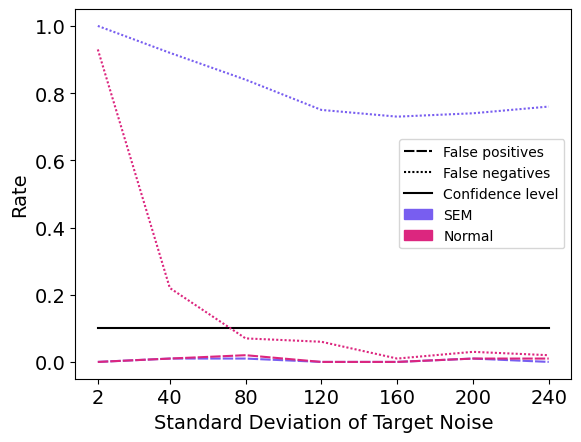

<Figure size 640x480 with 0 Axes>

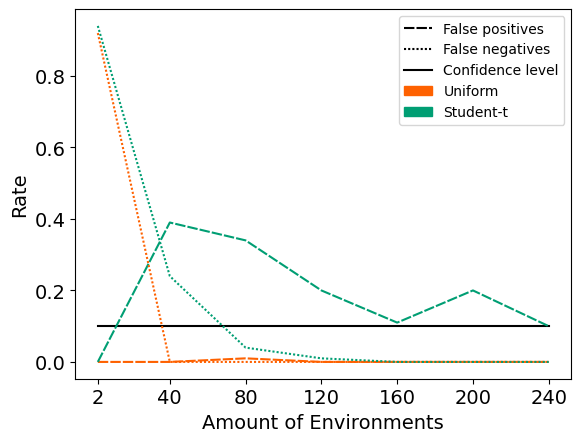

Environment size 1 of 7
Environment size 2 of 7
Environment size 3 of 7
Environment size 4 of 7
Environment size 5 of 7
Environment size 6 of 7
Environment size 7 of 7


<Figure size 640x480 with 0 Axes>

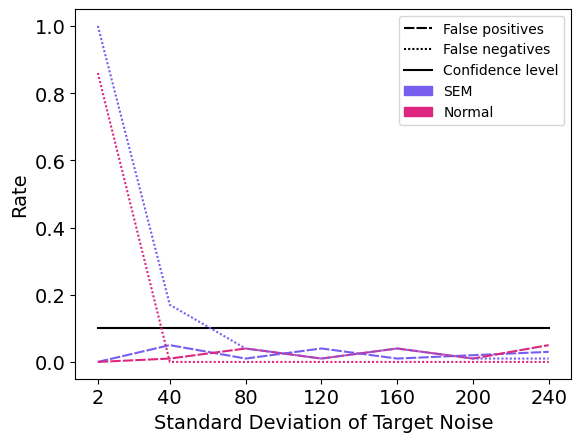

<Figure size 640x480 with 0 Axes>

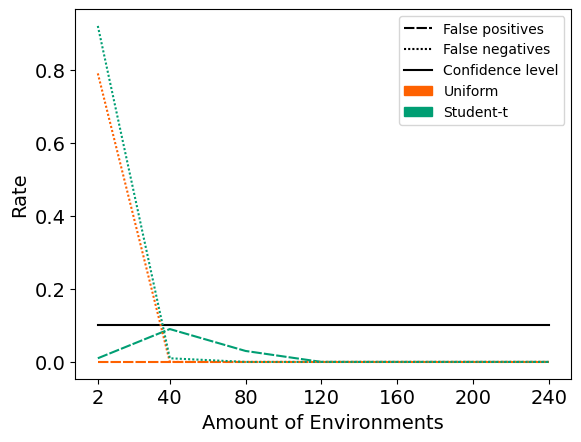

<Figure size 640x480 with 0 Axes>

In [7]:
### Changing number of environments
for n in [10,14]:
    np.random.seed(1)
    d=6  #Dimensionality
    supp=(1,2) #support indices
    s=len(supp)  #Number of support entries
    environments=[2,40,80,120,160,200,240]
    fntrunc=np.zeros((len(environments)))
    fptrunc=np.zeros((len(environments)))
    fnt=np.zeros((len(environments)))
    fpt=np.zeros((len(environments)))
    fnind=np.zeros((len(environments)))
    fpind=np.zeros((len(environments)))
    fn=np.zeros((len(environments)))
    fp=np.zeros((len(environments)))
    runs=100
    l=1 # Number of intervals we combine for the statistics
    B=100 # Bootstrap runs
    I=environments[-1]      #Number of Intervals 
    a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
    subsets = [item for sublist in a for item in sublist]
    dic={}
    # We first fix the data for all runs, to eliminate the randomness of this.
    betas=np.zeros((runs,I,d))
    for r in range(runs):
        for i in range(I):
            betas[r,i,supp]=np.random.uniform(low=1,high=5,size=(s))

    for o,I in enumerate(environments):
        print('Environment size',o+1,'of',len(environments))
        for r in range(runs):
            X=[]
            Y=[]
            Xind=[]
            Yind=[]
            Xtrunc=[]
            Ytrunc=[]
            Xt=[]
            Yt=[]
            for i in range(I):
                x=np.zeros((n,d))
                y=np.zeros((n))
                std=np.random.uniform(low=1,high=5,size=(d))
                x[:,0]=np.random.normal(scale=std[0],size=(n))
                x[:,1]=x[:,0]+np.random.normal(scale=std[1],size=(n))
                x[:,2]=0.3*x[:,1]+np.random.normal(scale=std[2],size=(n))
                x[:,3]=0.2*x[:,2]+np.random.normal(scale=std[3],size=(n))
                e=np.random.multivariate_normal(0*np.ones(n),(2)*np.eye(n))
                y=x@betas[r,i,:]+e
                x[:,4]=np.random.normal(scale=std[4],size=(n))+0.1*x[:,1]+y
                x[:,5]=np.random.normal(scale=std[5],size=(n))+y

                X.append(x)
                Y.append(y)

                xind=np.zeros((n,d))
                yind=np.zeros((n))
                ytrunc=np.zeros((n))
                yt=np.zeros((n))
                xtrunc=np.zeros((n,d))
                xt=np.zeros((n,d))

                mean=np.random.uniform(low=-1,high=1,size=(d))


                for p in range(d):
                    xtrunc[:,p]=np.random.uniform(low=-6*std[p]**2,high=6*std[p]**2,size=(n))+mean[p]
                    xt[:,p]=np.random.standard_t(2*(std[p])**(2)/((std[p])**(2)-1),size=(n))+mean[p]
                    xind[:,p]=np.random.normal(mean[p],scale=std[p],size=(n))
                yind=xind@betas[r,i,:]+e
                etrunc=np.random.uniform(low=-6*(2)**2,high=6*(2)**2,size=(n))
                ytrunc=xtrunc@betas[r,i,:]+etrunc
                et=np.random.standard_t(2*((2))**(2)/(((2))**(2)-1),size=(n))
                yt=xt@betas[r,i,:]+et


                Xind.append(xind)
                Yind.append(yind)
                Xtrunc.append(xtrunc)
                Ytrunc.append(ytrunc)
                Xt.append(xt)
                Yt.append(yt)

            plausibleS=loli.gauss(X,Y)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fp[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fn[o]+=1/runs

            plausibleS=loli.gauss(Xind,Yind)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fpind[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fnind[o]+=1/runs


            plausibleS=loli.gauss(Xtrunc,Ytrunc)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fptrunc[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fntrunc[o]+=1/runs

            plausibleS=loli.gauss(Xt,Yt)
            if not not plausibleS:
                supphat=set.intersection(*plausibleS)
                if len(supphat.difference(set(supp)))>0:
                    fpt[o]+=1/runs
                if len(set(supp).difference(supphat))>0:
                    fnt[o]+=1/runs

    fig, ax = plt.subplots()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)

    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    sem = Patch([], [], color='#785EF0',label='SEM')
    normal = Patch([], [], color='#DC267F',label='Normal')
    trunc = Patch([], [], color='#FE6100',label='Uniform')
    student = Patch([], [], color='#009E73',label='Student-t')
    conf= plt.Line2D([], [], color='black',label='Confidence level')

    plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level',color='black')
    plt.plot(environments,fp,'#785EF0',label='False Positive SEM',linestyle=(0, (5, 1)))
    plt.plot(environments,fpind,'#DC267F',label='False Positive Normal',linestyle=(0, (5, 1)))
    plt.plot(environments,fn,'#785EF0',label='False Negative SEM',linestyle=(0, (1, 1)))
    plt.plot(environments,fnind,'#DC267F',label='False Negative Normal',linestyle=(0, (1, 1)))
    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    ax.legend(handles=[false_pos,false_neg,conf,sem,normal])
    plt.xticks(environments)
    plt.xlabel('Standard Deviation of Target Noise',fontsize=14)
    plt.ylabel('Rate',fontsize=14)
    plt.show()
    plt.savefig('Figures/EnvironmentchangeSemN='+str(n)+'.eps',bbox_inches="tight",format='eps')


    fig, ax = plt.subplots()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)
    plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level',color='black')
    plt.plot(environments,fptrunc,'#FE6100',label='False Positive Truncated',linestyle=(0, (5, 1)))
    plt.plot(environments,fpt,'#009E73',label='False Positive Student-t',linestyle=(0, (5, 1)))
    plt.plot(environments,fntrunc,'#FE6100',label='False Negative Truncated',linestyle=(0, (1, 1)))
    plt.plot(environments,fnt,'#009E73',label='False Negative Student-t',linestyle=(0, (1, 1)))
    false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
    false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
    ax.legend(handles=[false_pos,false_neg,conf,trunc,student])
    plt.xticks(environments)
    plt.xlabel('Amount of Environments',fontsize=14)
    plt.ylabel('Rate',fontsize=14)
    plt.show()
    plt.savefig('Figures/EnvironmentchangeNonNormalN='+str(n)+'.eps',bbox_inches="tight",format='eps')